## Indigo Airline related Tweets (based on keywords) - 2019
#### To find subjectivity and polarity 

Twitter API was used for getting access to the historical twitter data from 2019. This data was used to augmented our original kaggle-based flight dataset for the purpose of this project.

Libraries such as TextBlob and Levenshtein were used to for sentiment analysis on the twitter data.

In [ ]:

import pandas as pd
from textblob import TextBlob
import networkx as nx
import Levenshtein
import random
import itertools
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [12]:
df_twitter = pd.read_csv("indigodelay_1000_new.csv")

In [13]:
df_twitter
df_twitter = df_twitter.drop(['id','created_at','favorite_count','retweet_count','entities','screen_name'], axis=1)

In [14]:
tweets_users = df_twitter['text'].tolist()

In [16]:
tweets_users

['#indigosucks @IndiGo6E 6E149 passengers were made to sit like fool till now... No communication by ground staff on… https://t.co/WTCbErZf9H',
 'RT @KSRLAW: #Indigo what is happening? I was boarded #6E381 from #Chennai at 1810 Hrs saying flight on time. That time itself checked this…',
 'RT @DaharwalK: M also facing prblms of Delay of flight✈.. It\'s too cold😐 here &amp; Indigo is not following direction of DG aviation.. \n"No war…',
 'RT @DaharwalK: M also facing prblms of Delay of flight✈.. It\'s too cold😐 here &amp; Indigo is not following direction of DG aviation.. \n"No war…',
 "M also facing prblms of Delay of flight✈.. It's too cold😐 here &amp; Indigo is not following direction of DG aviation..… https://t.co/T1Dm5XTYi4",
 '@IndiGo6E such a pathetic service and incessant delay in flght 6E 31 today..who will compensate for loss of my valu… https://t.co/ES23zMco72',
 '@IndiGo6E @indigo So as per the captain there is another 2 hour delay on the Tarmac while my #indigo app has made 

In [17]:
# Truing subjectivity
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
testimonial.sentiment
testimonial.sentiment.subjectivity

0.4357142857142857

In [18]:
testimonial = TextBlob(" I wish flight prices were lower!")
testimonial.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

## Cleaning Twitter Data by removing duplicates and Hyperlinks

In [19]:
def compare(tweet1, threshold=0.7):
    # compare tweets using Levenshtein distance (or whatever string comparison metric) 
    matches = df_twitter['text'].apply(lambda tweet2: (Levenshtein.ratio(tweet1, tweet2) >= threshold))

    # get positive matches
    matches = matches[matches].index.tolist()

    # convert to list of tuples
    return [*zip(iter(matches[:-1]), iter(matches[1:]))]

# create graph objects
nodes = df_twitter.index.tolist()
edges = [*itertools.chain(*df_twitter["text"].apply(compare))]

# create graphs
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# get connected component indexes
grouped_indexes = [*nx.connected_components(G)]

# get a random choice index from each group
filtered_indexes = [random.choice([*_]) for _ in grouped_indexes]

df_twitter=df_twitter.loc[filtered_indexes]

#x_removed_duplicates = df['tweet'].tolist()
#df_cleaned = pd.DataFrame({'tweet' : x_removed_duplicates})

In [20]:
df_twitter

,date,text
0,2019-12-30,#indigosucks @IndiGo6E 6E149 passengers were m...
1,2019-12-30,RT @KSRLAW: #Indigo what is happening? I was b...
2,2019-12-30,RT @DaharwalK: M also facing prblms of Delay o...
5,2019-12-30,@IndiGo6E such a pathetic service and incessan...
6,2019-12-30,@IndiGo6E @indigo So as per the captain there ...
...,...,...
1221,2019-01-03,@varunrulz07 @IndiGo6E What alternate you peop...
1222,2019-01-02,@IndiGo6E Thank you Indigo for a SHITTY Indi-...
1223,2019-01-02,Unexplained delay in Indigo Flight 6E-135 From...
1224,2019-01-01,@IndiGo6E There is no delay in @flyspicejet fl...


In [21]:
df_twitter['text'] = df_twitter['text'].str.replace("#", '', regex=False)
df_twitter['text'] = df_twitter['text'].str.replace("@", '', regex=False)
df_twitter['text'] = df_twitter['text'].str.replace("indigosucks", 'indigo sucks', regex=False)

In [22]:
df_twitter

,date,text
0,2019-12-30,indigo sucks IndiGo6E 6E149 passengers were ma...
1,2019-12-30,RT KSRLAW: Indigo what is happening? I was boa...
2,2019-12-30,RT DaharwalK: M also facing prblms of Delay of...
5,2019-12-30,IndiGo6E such a pathetic service and incessant...
6,2019-12-30,IndiGo6E indigo So as per the captain there is...
...,...,...
1221,2019-01-03,varunrulz07 IndiGo6E What alternate you people...
1222,2019-01-02,IndiGo6E Thank you Indigo for a SHITTY Indi-'...
1223,2019-01-02,Unexplained delay in Indigo Flight 6E-135 From...
1224,2019-01-01,IndiGo6E There is no delay in flyspicejet flig...


In [23]:
df_twitter.to_csv('srushtiadd.csv',index=False)

## Splitting the date column 

In [24]:
df_twitter[["year", "month", "day"]] = df_twitter["date"].str.split("-", expand = True)
df_twitter['day'] = df_twitter['day'].astype(int)
df_twitter['month'] = df_twitter['month'].astype(int)

In [25]:
df_twitter.head()

,date,text,year,month,day
0,2019-12-30,indigo sucks IndiGo6E 6E149 passengers were ma...,2019,12,30
1,2019-12-30,RT KSRLAW: Indigo what is happening? I was boa...,2019,12,30
2,2019-12-30,RT DaharwalK: M also facing prblms of Delay of...,2019,12,30
5,2019-12-30,IndiGo6E such a pathetic service and incessant...,2019,12,30
6,2019-12-30,IndiGo6E indigo So as per the captain there is...,2019,12,30


In [26]:
df_twitter = df_twitter.drop(['date', 'year'], axis=1)
df_twitter.head()

,text,month,day
0,indigo sucks IndiGo6E 6E149 passengers were ma...,12,30
1,RT KSRLAW: Indigo what is happening? I was boa...,12,30
2,RT DaharwalK: M also facing prblms of Delay of...,12,30
5,IndiGo6E such a pathetic service and incessant...,12,30
6,IndiGo6E indigo So as per the captain there is...,12,30


## Applying textblob on every row to get polarity and subjectivity scores 

In [27]:
df_twitter['polarity'] = df_twitter.apply(lambda row: TextBlob(row.text).sentiment.polarity, axis=1)


In [28]:
df_twitter['subjectivity'] = df_twitter.apply(lambda row: TextBlob(row.text).sentiment.subjectivity, axis=1)


In [29]:
df_twitter.head(200)

,text,month,day,polarity,subjectivity
0,indigo sucks IndiGo6E 6E149 passengers were ma...,12,30,-0.30,0.30
1,RT KSRLAW: Indigo what is happening? I was boa...,12,30,0.00,0.00
2,RT DaharwalK: M also facing prblms of Delay of...,12,30,0.00,0.10
5,IndiGo6E such a pathetic service and incessant...,12,30,-0.50,0.75
6,IndiGo6E indigo So as per the captain there is...,12,30,0.00,0.00
...,...,...,...,...,...
275,IndiGo6E worst experience with flight 1402 as ...,11,8,-0.50,0.55
274,"I am unfortunately travelling with 6E587, BOM ...",11,8,0.15,0.95
276,IndiGo6E CAN U PLZ TELL ME AS M HAVING A CONNE...,11,8,0.00,0.00
277,IndiGo6E Air traffic conjunction for 1 hour 15...,11,8,0.00,0.00


## Applying

In [30]:
df_pol=df_twitter.groupby(['month','day'], as_index=False)['polarity'].mean()

In [31]:
df_sub=df_twitter.groupby(['month','day'], as_index=False)['subjectivity'].mean()

In [32]:
df_pol.to_csv('pol',index=False)
df_sub.to_csv('sub',index=False)

## Making Histograms to understand the general sentiment towards Indigo Airlines Prices

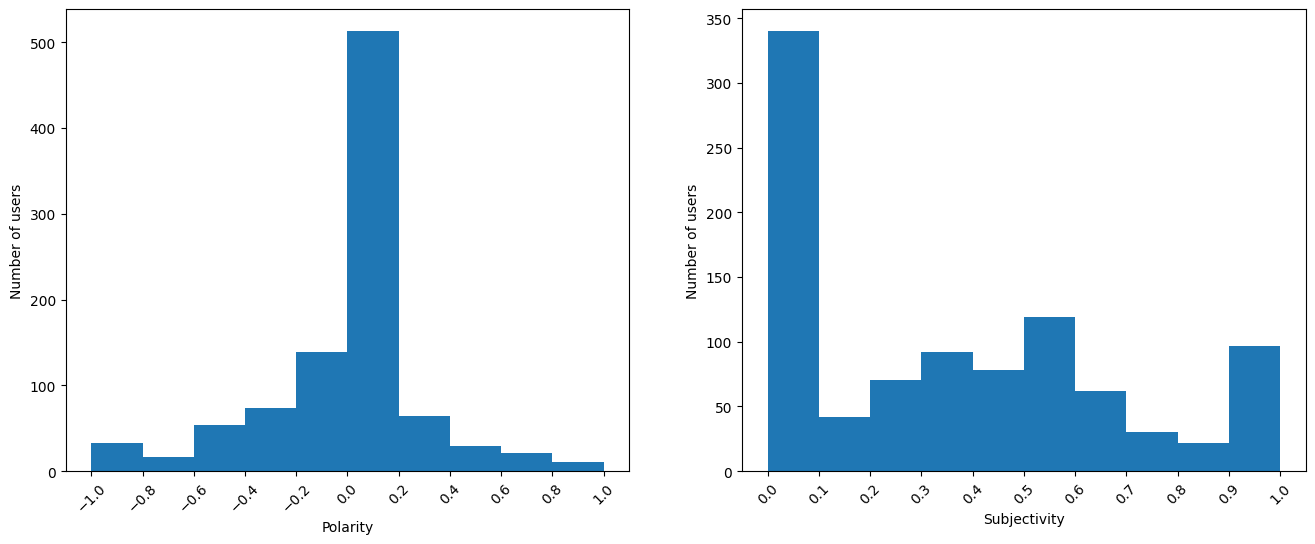

In [33]:
fig = plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
n, bins, patches = plt.hist(df_twitter.polarity)
plt.xticks(bins)
plt.ylabel('Number of users')
plt.xlabel('Polarity')
plt.xticks(rotation = 45)


plt.subplot(1, 2, 2) # index 2
n, bins, patches = plt.hist(df_twitter.subjectivity)
plt.xticks(bins)
plt.ylabel('Number of users')
plt.xlabel('Subjectivity')
plt.xticks(rotation = 45)


plt.show()